In [14]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import pandas as pd

In [15]:
def regress(*args):
    #import dependencies
    import sklearn as sk
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    from sklearn import feature_selection
    import statsmodels.api as sm
    from patsy import dmatrices
    import matplotlib.pyplot as plt

    #define arguments
    dataframe=args[0]
    y=args[1]
    xvars=[]
    for i in range(2,len(args)):
        xvars.append(args[i])
    x = dataframe[[item for item in xvars]]
    y = dataframe[y].values.reshape(-1, 1)
    #fit the model
    model.fit(x,y)

    #Generate Fit Statistics
    ##prep data for patsy
    list=[]
    for item in xvars:
        list.append(f' + {item}')
    string="".join(list)
    newstring=string[3:]

    ind=args[1]
    ind=ind.strip('"')

    ##Get fitstats from patsy
    Y,X = dmatrices(f"{ind} ~ {newstring}", data=dataframe, return_type="dataframe")
    ols = sm.OLS(Y, X)
    ols_result = ols.fit()
    print(ols_result.summary())

    #Plot the Residuals
    print("\n Residual Plot")
    predictions = model.predict(x)
    plt.scatter(predictions, predictions - y, color='coral',linewidths=0.5)
    plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='brown', linewidth=3)
    plt.show()

In [21]:

# df = pd.read_csv("../localData/regressionData1.csv")
df = pd.read_csv("localData/toxicAndDistanceAndCensusVars.csv")

In [25]:
df.head()

,Unnamed: 0.1,Unnamed: 0,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02008_001E,B02009_001E,B19013_001E,...,black_alone_population,median_household_income_past_12_months,median_housing_cost_past_12_months,total_population,proportion_some_black,proportion_alone_black,proportion_some_white,proportion_alone_white,number_of_facilities_in_tract,distance_nearest_facility
0,0,0,17031171100,POLYGON ((-87.78634604202203 41.94548302117783...,4013.0,3110.0,34.0,3117.0,34.0,69330.0,...,34.0,69330.0,1447.0,4013.0,0.008472,0.008472,0.776726,0.774981,0.0,2477.360557
1,1,1,17031191301,POLYGON ((-87.78544296566692 41.92367802729522...,5525.0,2640.0,224.0,2989.0,476.0,50046.0,...,224.0,50046.0,1283.0,5525.0,0.086154,0.040543,0.540995,0.477828,0.0,597.459824
2,2,2,17031191302,POLYGON ((-87.77571600777046 41.92382700867927...,5046.0,2823.0,176.0,2848.0,176.0,45962.0,...,176.0,45962.0,1186.0,5046.0,0.034879,0.034879,0.564407,0.559453,2.0,0.000000
3,3,3,17031190701,POLYGON ((-87.76624596804527 41.93127697094171...,2735.0,1700.0,29.0,1772.0,77.0,42270.0,...,29.0,42270.0,1117.0,2735.0,0.028154,0.010603,0.647898,0.621572,0.0,1210.359102
4,4,4,17031252102,POLYGON ((-87.76486399981219 41.88024599286711...,6864.0,162.0,6264.0,162.0,6264.0,38500.0,...,6264.0,38500.0,1021.0,6864.0,0.912587,0.912587,0.023601,0.023601,0.0,1173.119840


                                OLS Regression Results                               
Dep. Variable:     distance_nearest_facility   R-squared:                       0.014
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     9.330
Date:                       Fri, 24 Mar 2023   Prob (F-statistic):            0.00234
Time:                               02:50:19   Log-Likelihood:                -5447.2
No. Observations:                        664   AIC:                         1.090e+04
Df Residuals:                            662   BIC:                         1.091e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

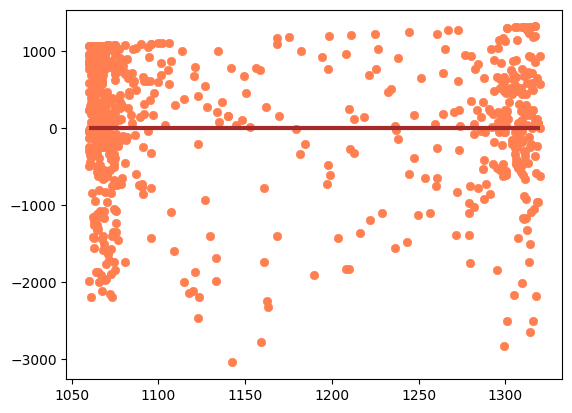

In [24]:
regress(df, "distance_nearest_facility", "proportion_alone_black")
#a one percent increase in the black-alone population of a census tract is associated with a 264 meter increase (not decrease?) in the distance from a toxic facility

In [ ]:
regress(df, "distance_nearest_facility", "proportion_black", "median_household_income_past_12_months")